In [2]:
import os
import sys
import shutil
import argparse
import IPython 
from PIL import Image, ImageFont, ImageDraw
from enum import Enum
from typing import Callable, List, Optional, Tuple, Union
from functools import partial
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import VisionDataset
from torchvision.transforms import transforms
import numpy as np
import pandas as pd
import skimage
from scipy import sparse
import matplotlib.pyplot as plt 
import torchxrayvision as xrv

from dinov2.models.unet import UNet
from dinov2.data import SamplerType, make_data_loader, make_dataset
from dinov2.data.datasets import NIHChestXray, MC
from dinov2.data.loaders import make_data_loader
from dinov2.data.transforms import make_segmentation_target_transform, make_segmentation_transform
from dinov2.eval.setup import setup_and_build_model
from dinov2.eval.utils import ModelWithIntermediateLayers, ModelWithNormalize, evaluate, extract_features
from dinov2.eval.metrics import build_segmentation_metrics, MetricAveraging
from dinov2.utils import show_image_from_tensor
from dinov2.eval.segmentation import setup_decoders, DINOV2Encoder, LinearDecoder
from fvcore.common.checkpoint import Checkpointer, PeriodicCheckpointer

ModuleNotFoundError: No module named 'dinov2'

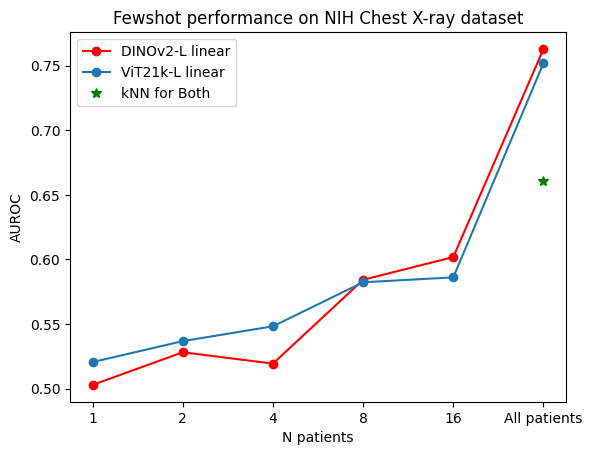

In [56]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

x = [1, 2, 4, 8, 16, "All patients"]
y_dinov2 = [0.5028, 0.5281, 0.5193, 0.5842, 0.6018, 0.763]
y_imagenet = [0.5205, 0.5367, 0.5482, 0.5823, 0.5861, 0.752]


# Create the plot
ln1, = plt.plot(x, y_dinov2, marker='o', label="DINOv2-L linear", color="red")
ln2, = plt.plot(x, y_imagenet, marker='o', label="ViT21k-L linear")
black_star = mlines.Line2D([], [], color='green', marker='*', linestyle='None',
                            markersize=7.5, label='kNN for Both')

# Add title and labels
plt.title('Fewshot performance on NIH Chest X-ray dataset')
plt.xlabel('N patients')
plt.ylabel('AUROC')

knn_x = ["All patients"] 
knn_y = [0.661]
plt.plot(knn_x, knn_y, marker='*', color="green", markersize=7.5)

plt.legend(handles=[ln1, ln2, black_star], loc="upper left")

# Show the plot
plt.show()